<a href="https://colab.research.google.com/github/javohir-ergashboyev/DL-projects/blob/main/Fruit_Class_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 29.85 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
!cd OIDv4_ToolKit &&  python3 main.py downloader --Dataset /content --classes Apple Orange Banana --type_csv train --limit 100


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Apple.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 64277 KB/s, 0 seconds passed
[DOWNLOAD] | File cl

In [ ]:
labels=[i for i in os.listdir('train')]
labels

['Banana', 'Apple', 'Orange']

In [ ]:
path='/content/train/'
import pathlib
data_dir=pathlib.Path(path)


In [ ]:
apple=list(data_dir.glob('Apple/*'))
banana=list(data_dir.glob('Banana/*'))
orange=list(data_dir.glob('Orange/*'))
fruit_dict={
    'apple':apple,
    'banana':banana,
    'orange':orange
}
label_dict={
    'apple':0,
    'banana':1,
    'orange':2
}

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X=[]
y=[]
for label, imgs in fruit_dict.items():
  for i in imgs:
    img=cv.imread(f'{i}')
    resized=cv.resize(img, (100,100))
    print(i)
    X.append(resized)
    y.append(label_dict[label])


/content/train/Apple/2333446019d25b92.jpg
/content/train/Apple/067664613388e55e.jpg
/content/train/Apple/a54ac9431a985bf6.jpg
/content/train/Apple/15cd7e4b0f75834d.jpg
/content/train/Apple/7d5be279c905b3fa.jpg
/content/train/Apple/025f1a6538c24716.jpg
/content/train/Apple/cc30cf6b3a56cdd9.jpg
/content/train/Apple/0b5f76e0a72ed7ca.jpg
/content/train/Apple/ae54236f37a606f6.jpg
/content/train/Apple/50aa8f4a83abf19f.jpg
/content/train/Apple/6cef4b79f59c4bf8.jpg
/content/train/Apple/028ee4d4f435c506.jpg
/content/train/Apple/54fe3f6bf6edfe4b.jpg
/content/train/Apple/00d1a44121b1b883.jpg
/content/train/Apple/3bc38028dd447e6d.jpg
/content/train/Apple/ecde5ba3f794c582.jpg
/content/train/Apple/de1c62ab565a93ac.jpg
/content/train/Apple/6ec3f923c4226c94.jpg
/content/train/Apple/4d158a80586e6695.jpg
/content/train/Apple/3cbe7ca2232d2aed.jpg
/content/train/Apple/8f9bc23a9e9b9f70.jpg
/content/train/Apple/18edc752ff033d99.jpg
/content/train/Apple/7fc22c6fb981184c.jpg
/content/train/Apple/1a00491d5d2ba

In [ ]:
# prompt: remove Label folder inside Apple

!rm -rf /content/train/Apple/Label
!rm -rf /content/train/Banana/Label
!rm -rf /content/train/Orange/Label


In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X=X/255

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest=train_test_split(X,y, test_size=0.1, random_state=10, stratify=y)

In [ ]:
X.shape,xtrain.shape,xtest.shape, ytrain.shape


((300, 100, 100, 3), (270, 100, 100, 3), (30, 100, 100, 3), (270,))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = (100, 100, 3)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 33856)             0         
                                                                 
 dense_24 (Dense)            (None, 128)             

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example of using data augmentation during training
datagen.fit(xtrain)  # Assuming X_train is your training data
model.fit(datagen.flow(xtrain, ytrain, batch_size=32), epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 72ms/step - loss: 0.6748 - accuracy: 0.7185
Epoch 2/100
9/9 [==============================] - 1s 72ms/step - loss: 0.6973 - accuracy: 0.7148
Epoch 3/100
9/9 [==============================] - 1s 73ms/step - loss: 0.5910 - accuracy: 0.7630
Epoch 4/100
9/9 [==============================] - 1s 70ms/step - loss: 0.6274 - accuracy: 0.7407
Epoch 5/100
9/9 [==============================] - 1s 71ms/step - loss: 0.6250 - accuracy: 0.7481
Epoch 6/100
9/9 [==============================] - 1s 70ms/step - loss: 0.6009 - accuracy: 0.7407
Epoch 7/100
9/9 [==============================] - 1s 71ms/step - loss: 0.6149 - accuracy: 0.7259
Epoch 8/100
9/9 [==============================] - 1s 73ms/step - loss: 0.6255 - accuracy: 0.7519
Epoch 9/100
9/9 [==============================] - 1s 76ms/step - loss: 0.6835 - accuracy: 0.7185
Epoch 10/100
9/9 [==============================] - 1s 71ms/step - loss: 0.6554 - accuracy: 0.7111
Epoch 11/100
9/9 [=

In [ ]:
model.fit(xtrain,ytrain, epochs=10)

Epoch 1/10
9/9 [==============================] - 2s 16ms/step - loss: 1.3265 - accuracy: 0.3704
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 1.1104 - accuracy: 0.4222
Epoch 3/10
9/9 [==============================] - 0s 13ms/step - loss: 1.0447 - accuracy: 0.4778
Epoch 4/10
9/9 [==============================] - 0s 12ms/step - loss: 0.9236 - accuracy: 0.5074
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 0.8043 - accuracy: 0.6111
Epoch 6/10
9/9 [==============================] - 0s 14ms/step - loss: 0.6758 - accuracy: 0.7444
Epoch 7/10
9/9 [==============================] - 0s 12ms/step - loss: 0.6096 - accuracy: 0.7704
Epoch 8/10
9/9 [==============================] - 0s 12ms/step - loss: 0.5040 - accuracy: 0.8037
Epoch 9/10
9/9 [==============================] - 0s 12ms/step - loss: 0.3681 - accuracy: 0.8963
Epoch 10/10
9/9 [==============================] - 0s 13ms/step - loss: 0.3189 - accuracy: 0.9000


In [ ]:
model.evaluate(xtest,ytest)

1/1 [==============================] - 0s 27ms/step - loss: 1.2325 - accuracy: 0.6000


[1.2325327396392822, 0.6000000238418579]

In [ ]:
from tensorflow.keras.preprocessing import image
def predict(img_path):
  img = image.load_img(img_path, target_size=(100, 100))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  predictions = model.predict(img_array)
  return np.argmax(predictions) + 1

1/1 [==============================] - 0s 31ms/step
Banana


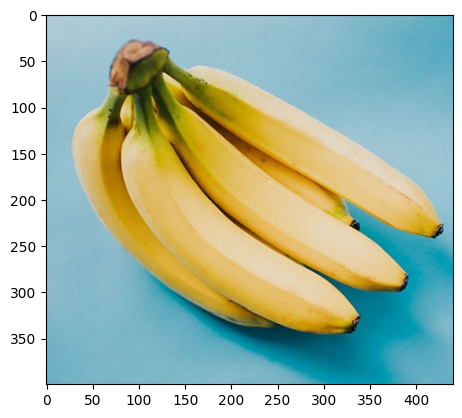

In [ ]:
img_path='banan.jpg'
im=cv.imread(img_path)
im=cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im)
predicted_class=predict(img_path)
if predicted_class==1:
  print('Apple')
elif predicted_class==2:
  print('Banana')
elif predicted_class==3:
  print('Orange')
else:
  print('Not predicted')

In [ ]:
# prompt: save model as pkl file

import pickle
model.save('my_model.pkl')


In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
